In [1]:
# Execute this first 
#
#  * trigger notebook styling
#  * check if notebook had been modified since its distribution
# 
# Note: executing any cells before this modifies the notebook.
# 
%run src/init_notebooks.py
hide_toggle()
#check_notebook()

In [2]:
import nglview as ng
import pandas as pd
import mdtraj as md
import numpy as np

In [3]:
# Go To Methane directory and use 94K

In [3]:
%cd ~/gromacs/build/Titan/methane/94K

/home/dragns/gromacs/build/Titan/methane/94K


In [4]:
!ls

box.gro		md.cpt		   npt.edr	      peaks.py
convert_dos.py	md.edr		   npt.gro	      potential.xvg
density.xvg	md.gro		   npt.log	      pressure.xvg
DOScheck	md.log		   npt.mdp	      production.mdp
dos.log		mdout.mdp	   npt.tpr	      results_dt01
DOS.py		md_prev.cpt	   npt.trr	      Results_index1
dt_05		md.tpr		   nvt.cpt	      results_noIndex
em.edr		md.trr		   nvt.edr	      SetupDOS
em.gro		methane_bonds.ndx  nvt.gro	      temperature.xvg
em.log		methane_bonds.py   nvt.log	      topol.top
em.mdp		methaneDOS.py	   nvt.mdp	      vacf_system.xvg
em.tpr		methane.gro	   nvt.tpr	      view_trajectory.py
em.trr		methane.pdb	   nvt.trr
HiRESpeaks.py	npt.cpt		   OLD_methaneDOS.py


In [5]:
# Load and view the .pdb or .gro file with the following lines
view = ng.show_structure_file("methane.pdb")
view

NGLWidget()

In [7]:
# Uncomment next line for vmd visual of molecule
#!vmd methane_titan.pdb

In [40]:
# Create larger box to grow simulation
!gmx editconf -f methane.pdb -o box.gro -box 2.40 2.40 2.40 -noc

# Add the Ammonia Molecules to the larger box
!gmx insert-molecules -f box.gro -ci methane.pdb -nmol 49 -o methane.gro -seed 12345 -try 10000

               :-) GROMACS - gmx editconf, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx editconf -f methane.pdb -o box.gro -box 2.40 2.40 2.40 -noc

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5 atoms
No velocities found
new box vectors :  2.400  2.400  2.400 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :  13.82               (nm^3)

GROMACS reminds you: "What's the point, yo, what's the spread?" (Red Hot Chili Peppers)

           :-) GROMACS - gmx insert-molecules, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx insert-molecules 

In [11]:
!ls

box.gro		em.mdp		  methane.pdb	     production.mdp   SetupDOS
convert_dos.py	methane_bonds.py  npt.mdp	     results_dt01     topol.top
DOS.py		methaneDOS.py	  nvt.mdp	     Results_index1
dt_05		methane.gro	  OLD_methaneDOS.py  results_noIndex


In [6]:
# View the system
view = ng.show_structure_file("methane.gro")
view.add_representation(repr_type='ball+stick', selection='SOL')
view.camera='orthographic'
view

NGLWidget()

In [42]:
#Energy Minimization
!gmx grompp -f em.mdp -c methane.gro -p topol.top -o em.tpr
!gmx mdrun -v -deffnm em -ntmpi 1 -ntomp 1

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f em.mdp -c methane.gro -p topol.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -545460226

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:    50      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group rest is 747.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

The largest distance between excluded atoms is 0.179 nm b

In [43]:
#Analyze results of EM
!printf "Potential\n0\n" | gmx energy -f em.edr -o potential.xvg -xvg none

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f em.edr -o potential.xvg -xvg none

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Pres.-DC      
  9  Pressure        10  Vir-XX          11  Vir-XY          12  Vir-XZ        
 13  Vir-YX          14  Vir-YY          15  Vir-YZ          16  Vir-ZX        
 17  Vir-ZY          18  Vir-ZZ          19  Pres-XX         20  Pres-

<Axes: xlabel='step'>

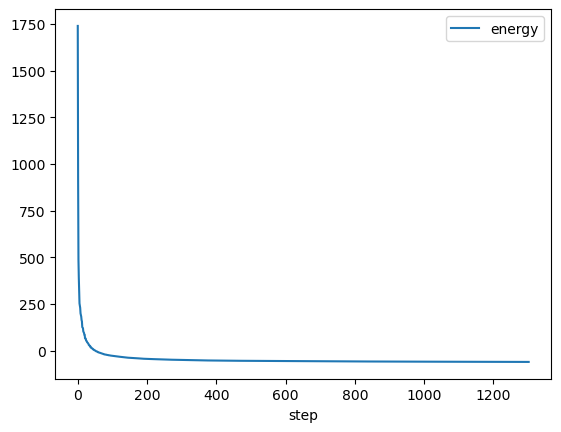

In [44]:
# Print graph
df = pd.read_csv('potential.xvg', sep='\\s+', header=None, names=['step','energy'])
df.plot('step')

In [17]:
#!printf "Potential\n0\n" | gmx energy -f em.edr -o potential.xvg
#!xmgrace potential.xvg

In [45]:
# Temperature EQ T=94K
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr 
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm nvt

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Setting the LD random seed to 1054650237

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'

Setting gen_seed to -346226995

Velocities were taken from a Maxwell distribution at 150 K
Analysing residue names:
There are:    50      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Simulated annealing for group System: Single, 6 timepoints
Time (ps)   Temperature (K)
      0.0      150.0
   1000.0      135.0
   2000.0      120.0
   3000

In [46]:
# Analyze Temp run
!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Vir-XX          15  Vir-XY          16  Vir-XZ        
 17  Vir-YX          18  Vir-YY          19  Vir-YZ         

<Axes: xlabel='time'>

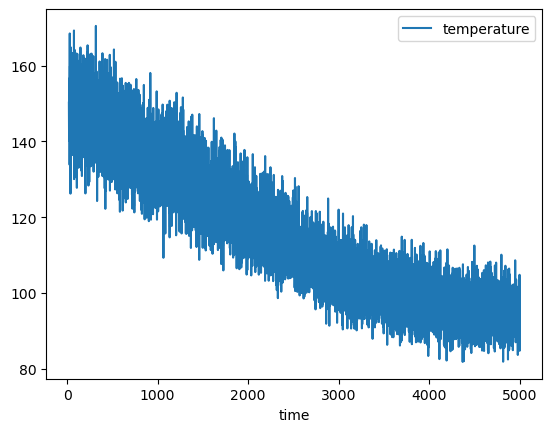

In [47]:
# Plot Temp data
df = pd.read_csv('temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')
#!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -b 20
#!xmgrace temperature.xvg

In [48]:
# Pressure EQ P = 1.5 bars
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm npt

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -572802075

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:    50      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 747.00

The largest distance between excluded atoms is 0.187 nm between atom 222 and 223

Determining Verlet buffer for a tolerance of 0.00

In [49]:
# Analyze Pressure Data
!echo "Pressure" | gmx energy -f npt.edr -o pressure.xvg -xvg none

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f npt.edr -o pressure.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV              20  Enth

<Axes: xlabel='time'>

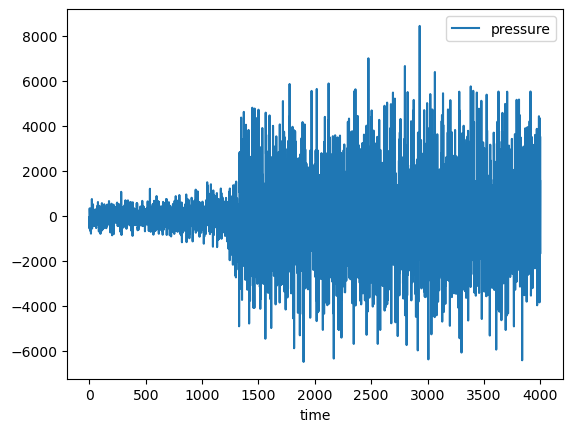

In [50]:
df = pd.read_csv('pressure.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

In [24]:
#!echo "Pressure" | gmx energy -f npt.edr -o pressure.xvg
#!xmgrace pressure.xvg

In [51]:
# Look at density of system
!echo "Density" | gmx energy -f npt.edr -o density.xvg -xvg none

                :-) GROMACS - gmx energy, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx energy -f npt.edr -o density.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  LJ-(SR)          4  Disper.-corr. 
  5  Coulomb-(SR)     6  Coul.-recip.     7  Potential        8  Kinetic-En.   
  9  Total-Energy    10  Conserved-En.   11  Temperature     12  Pres.-DC      
 13  Pressure        14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume          18  Density         19  pV              20  Entha

<Axes: xlabel='time'>

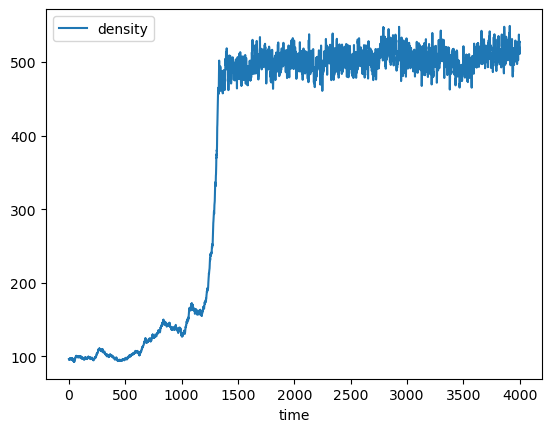

In [52]:
#Plot density
df = pd.read_csv('density.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

In [53]:
!tail -1 npt.gro

   1.36185   1.36185   1.36185


In [5]:
#Production Run
!gmx grompp -f production.mdp -c npt.gro -t npt.cpt -p topol.top -o md.tpr
!gmx mdrun -ntmpi 1 -ntomp 6 -v -deffnm md

                :-) GROMACS - gmx grompp, 2024.3-conda_forge (-:

Executable:   /home/dragns/miniconda3/envs/md-intro-tutorial/bin.SSE2/gmx
Data prefix:  /home/dragns/miniconda3/envs/md-intro-tutorial
Working dir:  /home/dragns/gromacs/build/Titan/methane/94K
Command line:
  gmx grompp -f production.mdp -c npt.gro -t npt.cpt -p topol.top -o md.tpr

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -613061158

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'CH4'
Analysing residue names:
There are:    50      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group System is 747.00

The largest distance between excluded atoms is 0.186 nm between atom 59 and 60

Determining Verlet buffer for a tolerance of 0.005 kJ/mo

In [5]:
import os
print("md.trr exists:", os.path.exists("md.trr"))
print("methane.gro exists:", os.path.exists("methane.gro"))

md.trr exists: True
methane.gro exists: True


In [ ]:
import mdtraj as md
import os

# Check files exist
print("md.trr exists:", os.path.exists("md.trr"))
print("methane.gro exists:", os.path.exists("methane.gro"))

# Load and check trajectory
try:
    traj = md.load_trr("md.trr", top="methane.gro", stride=10)
    print(f"Loaded trajectory: {traj.n_frames} frames, {traj.n_atoms} atoms")
    print(f"Time range: {traj.time[0]:.1f} to {traj.time[-1]:.1f} ps")
    
    # Try creating view
    view = ng.show_mdtraj(traj)
    print(f"View created: {type(view)}")
    
    # Display
    view
except Exception as e:
    print(f"Error: {e}")

In [9]:
import nglview as ng
import mdtraj as md

# Enable widget rendering
ng.default_view_backend = 'notebook'  # or 'ipywidgets'
# Load trajectory
traj = md.load_trr("md.trr", top="md.gro")
view = ng.show_mdtraj(traj)
# Display
view

NGLWidget(max_frame=3333333)